# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

In [190]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import io
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plt
from pandas import Series, DataFrame
import json
from pandas.io.json import json_normalize
import sys
import scipy as sp
import zipfile

import numpy.polynomial.polynomial as poly

from geopandas.tools import sjoin
import geopandas as gpd
import shapely
from shapely.geometry import LineString, Point
from fiona.crs import from_epsg

try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
    
%matplotlib inline
%pylab inline

puidata= os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
    
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIdata")

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['poly', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [58]:
%pylab inline

import datetime as dt  
import io 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import numpy as np
from numpy import random
import numpy.linalg as linalg

import math
from math import cos, log

import patsy
import pandas as pd
# ADS kernel not working for this:
# import pandas_datareader.data as web
# from PIL import Image

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import seaborn as sns
from scipy.optimize import minimize
from scipy import stats
# from sklearn.model_selection import train_test_split
# from sklearn import linear_model
# from sklearn import neighbors, datasets
# from sklearn.ensemble import RandomForestClassifier

# from tabulate import tabulate
# import urllib.request as url

sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['log', 'cos']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [2]:
url1 = "https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv"
urllib.urlretrieve(url1, "World_firearms_murders_and_ownership_Sheet_1.csv")

('World_firearms_murders_and_ownership_Sheet_1.csv',
 <http.client.HTTPMessage at 0x7f3212e98d30>)

In [3]:
# ! curl -O https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv

In [4]:
df1 = pd.read_csv("World_firearms_murders_and_ownership_Sheet_1.csv",
                 usecols=["Country/Territory","Number of homicides by firearm", "Average total all civilian firearms"]) 
df1 = df1.dropna()
df1.head()

Country/Territory  Number of homicides by firearm  \
0           Albania                            56.0   
1           Algeria                            20.0   
4         Argentina                          1198.0   
5           Armenia                             9.0   
6         Australia                            30.0   

   Average total all civilian firearms  
0                             270000.0  
1                            1900000.0  
4                            3950000.0  
5                             380000.0  
6                            3050000.0

In [5]:
url2 = "data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78"
urllib.urlretrieve(url2, "Guns_owned_vs_mass_shootings_across_nations.csv")

('Guns_owned_vs_mass_shootings_across_nations.csv',
 <email.message.Message at 0x7f323c56f390>)

In [6]:
df2 = pd.read_csv("Guns_owned_vs_mass_shootings_across_nations.csv") 
df2.head()

Country  Guns per 100 inhabitants  Number of mass shootings (1983-2013)
0  Australia                      15.0                                     4
1    Austria                      30.4                                     1
2    Belgium                      17.2                                     2
3     Canada                      30.8                                     4
4    Denmark                      12.0                                     0

In [7]:
url3 = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
urllib.urlretrieve(url3, "WorldPop.zip")
! unzip "WorldPop.zip" 

Archive:  WorldPop.zip
  inflating: Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  


In [8]:
df3 = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv",skiprows = 3, sep = ",", usecols=["Country Name", "2012"]) 
df3.head()

Country Name        2012
0        Aruba    102577.0
1  Afghanistan  30696958.0
2       Angola  25096150.0
3      Albania   2900401.0
4      Andorra     82431.0

In [9]:
df31 = df3.rename(columns={'2012':'pop'})
df31.head()

Country Name         pop
0        Aruba    102577.0
1  Afghanistan  30696958.0
2       Angola  25096150.0
3      Albania   2900401.0
4      Andorra     82431.0

In [10]:
url4 = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"
urllib.urlretrieve(url4, "GDP.zip")
! unzip "GDP.zip"

Archive:  GDP.zip
  inflating: Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  


In [11]:
df4 = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv",skiprows = 3, sep = ",", usecols=["Country Name", "2012"]) 
df4.head()

Country Name          2012
0        Aruba           NaN
1  Afghanistan  2.053654e+10
2       Angola  1.139232e+11
3      Albania  1.231978e+10
4      Andorra  3.164615e+09

In [12]:
df41 = df4.rename(columns={"2012": "gdp"})
df41.head()

Country Name           gdp
0        Aruba           NaN
1  Afghanistan  2.053654e+10
2       Angola  1.139232e+11
3      Albania  1.231978e+10
4      Andorra  3.164615e+09

In [13]:
df5 = df1.merge(df2, right_on="Country", left_on="Country/Territory") 
df5.head()

Country/Territory  Number of homicides by firearm  \
0         Australia                            30.0   
1           Austria                            18.0   
2           Belgium                            70.0   
3            Canada                           173.0   
4           Denmark                            15.0   

   Average total all civilian firearms    Country  Guns per 100 inhabitants  \
0                            3050000.0  Australia                      15.0   
1                            2500000.0    Austria                      30.4   
2                            1800000.0    Belgium                      17.2   
3                            9950000.0     Canada                      30.8   
4                             650000.0    Denmark                      12.0   

   Number of mass shootings (1983-2013)  
0                                     4  
1                                     1  
2                                     2  
3                                     4  
4                                     0

In [14]:
df6 = df5.merge(df31, right_on="Country Name", left_on="Country/Territory") 
df6.head()

Country/Territory  Number of homicides by firearm  \
0         Australia                            30.0   
1           Austria                            18.0   
2           Belgium                            70.0   
3            Canada                           173.0   
4           Denmark                            15.0   

   Average total all civilian firearms    Country  Guns per 100 inhabitants  \
0                            3050000.0  Australia                      15.0   
1                            2500000.0    Austria                      30.4   
2                            1800000.0    Belgium                      17.2   
3                            9950000.0     Canada                      30.8   
4                             650000.0    Denmark                      12.0   

   Number of mass shootings (1983-2013) Country Name         pop  
0                                     4    Australia  22742475.0  
1                                     1      Austria   8429991.0  
2                                     2      Belgium  11128246.0  
3                                     4       Canada  34750545.0  
4                                     0      Denmark   5591572.0

In [15]:
df7 = df6.merge(df41, right_on="Country Name", left_on="Country/Territory") 
df7.head()

Country/Territory  Number of homicides by firearm  \
0         Australia                            30.0   
1           Austria                            18.0   
2           Belgium                            70.0   
3            Canada                           173.0   
4           Denmark                            15.0   

   Average total all civilian firearms    Country  Guns per 100 inhabitants  \
0                            3050000.0  Australia                      15.0   
1                            2500000.0    Austria                      30.4   
2                            1800000.0    Belgium                      17.2   
3                            9950000.0     Canada                      30.8   
4                             650000.0    Denmark                      12.0   

   Number of mass shootings (1983-2013) Country Name_x         pop  \
0                                     4      Australia  22742475.0   
1                                     1        Austria   8429991.0   
2                                     2        Belgium  11128246.0   
3                                     4         Canada  34750545.0   
4                                     0        Denmark   5591572.0   

  Country Name_y           gdp  
0      Australia  1.543411e+12  
1        Austria  4.094252e+11  
2        Belgium  4.978842e+11  
3         Canada  1.824289e+12  
4        Denmark  3.271489e+11

In [16]:
df8 = df7.drop(['Country Name_x', 'Country Name_y'],axis = 1)
df8.head()

Country/Territory  Number of homicides by firearm  \
0         Australia                            30.0   
1           Austria                            18.0   
2           Belgium                            70.0   
3            Canada                           173.0   
4           Denmark                            15.0   

   Average total all civilian firearms    Country  Guns per 100 inhabitants  \
0                            3050000.0  Australia                      15.0   
1                            2500000.0    Austria                      30.4   
2                            1800000.0    Belgium                      17.2   
3                            9950000.0     Canada                      30.8   
4                             650000.0    Denmark                      12.0   

   Number of mass shootings (1983-2013)         pop           gdp  
0                                     4  22742475.0  1.543411e+12  
1                                     1   8429991.0  4.094252e+11  
2                                     2  11128246.0  4.978842e+11  
3                                     4  34750545.0  1.824289e+12  
4                                     0   5591572.0  3.271489e+11

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


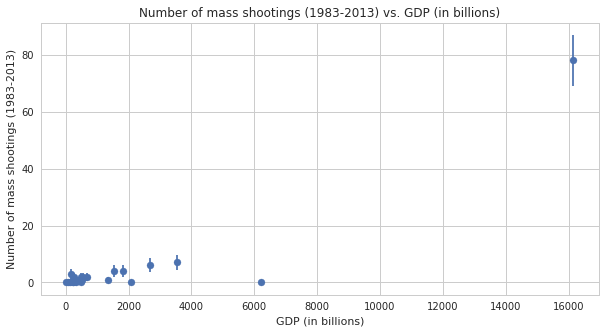

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [100]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df8.gdp / 1e9, df8['Number of mass shootings (1983-2013)'])
ax.errorbar(df8.gdp / 1e9, df8['Number of mass shootings (1983-2013)'], 
            yerr = np.sqrt(df8['Number of mass shootings (1983-2013)'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings (1983-2013)")
ax.set_ylim()
ax.set_title("Number of mass shootings (1983-2013) vs. GDP (in billions)")
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")


In [101]:
df8['shootingspp'] = df8["Number of mass shootings (1983-2013)"] / df8['pop'] * 1e3
df8.head()

Country/Territory  Number of homicides by firearm  \
0         Australia                            30.0   
1           Austria                            18.0   
2           Belgium                            70.0   
3            Canada                           173.0   
4           Denmark                            15.0   

   Average total all civilian firearms    Country  Guns per 100 inhabitants  \
0                            3050000.0  Australia                      15.0   
1                            2500000.0    Austria                      30.4   
2                            1800000.0    Belgium                      17.2   
3                            9950000.0     Canada                      30.8   
4                             650000.0    Denmark                      12.0   

   Number of mass shootings (1983-2013)         pop           gdp  shootingspp  
0                                     4  22742475.0  1.543411e+12     0.000176  
1                                     1   8429991.0  4.094252e+11     0.000119  
2                                     2  11128246.0  4.978842e+11     0.000180  
3                                     4  34750545.0  1.824289e+12     0.000115  
4                                     0   5591572.0  3.271489e+11     0.000000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


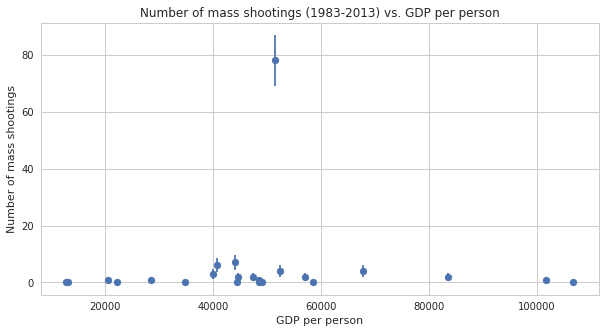

Number of mass shootings vs GDP per person, errors represent Poisson statistics.
the point on the top is assumed to be U.S.


In [102]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df8["gdp"] / df8['pop'] , df8['Number of mass shootings (1983-2013)'])
ax.errorbar(df8["gdp"] / df8['pop'], df8['Number of mass shootings (1983-2013)'], 
            yerr = np.sqrt(df8['Number of mass shootings (1983-2013)'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
ax.set_title("Number of mass shootings (1983-2013) vs. GDP per person")
pl.show()
print ("Number of mass shootings vs GDP per person, " + 
       "errors represent Poisson statistics.\n" + 
      "the point on the top is assumed to be U.S.")

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [103]:
df8.head()

Country/Territory  Number of homicides by firearm  \
0         Australia                            30.0   
1           Austria                            18.0   
2           Belgium                            70.0   
3            Canada                           173.0   
4           Denmark                            15.0   

   Average total all civilian firearms    Country  Guns per 100 inhabitants  \
0                            3050000.0  Australia                      15.0   
1                            2500000.0    Austria                      30.4   
2                            1800000.0    Belgium                      17.2   
3                            9950000.0     Canada                      30.8   
4                             650000.0    Denmark                      12.0   

   Number of mass shootings (1983-2013)         pop           gdp  shootingspp  
0                                     4  22742475.0  1.543411e+12     0.000176  
1                                     1   8429991.0  4.094252e+11     0.000119  
2                                     2  11128246.0  4.978842e+11     0.000180  
3                                     4  34750545.0  1.824289e+12     0.000115  
4                                     0   5591572.0  3.271489e+11     0.000000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


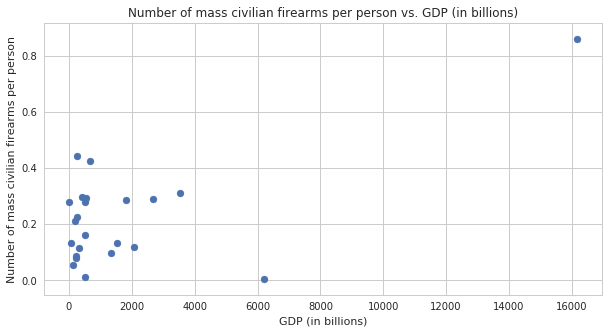

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass civilian firearms per person


In [104]:
# without error bar
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df8.gdp / 1e9 ,df8["Average total all civilian firearms"] / df8['pop'])
# ax.errorbar(df8.gdp / 1e9, df8["Average total all civilian firearms"] / df8['pop'], 
#             yerr = np.sqrt(df8["Average total all civilian firearms"] / df8['pop'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass civilian firearms per person")
ax.set_ylim()
ax.set_title("Number of mass civilian firearms per person vs. GDP (in billions)")
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass civilian firearms per person")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


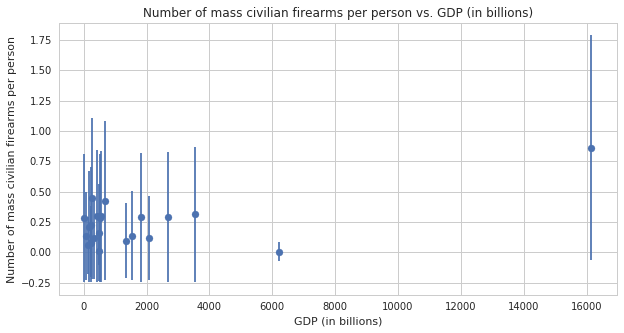

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass civilian firearms per person


In [105]:
# with error bar
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df8.gdp / 1e9 ,df8["Average total all civilian firearms"] / df8['pop'])
ax.errorbar(df8.gdp / 1e9, df8["Average total all civilian firearms"] / df8['pop'], 
            yerr = np.sqrt(df8["Average total all civilian firearms"] / df8['pop'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass civilian firearms per person")
ax.set_ylim()
ax.set_title("Number of mass civilian firearms per person vs. GDP (in billions)")
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass civilian firearms per person")

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0,0.5,'homicides by firearm per 1000 people counts')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


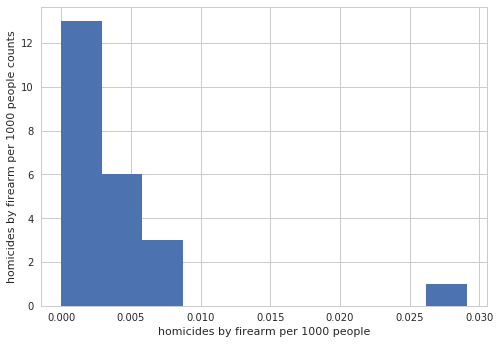

In [106]:
fig, ax = plt.subplots()
ax.hist(df8['Number of homicides by firearm'] / df8['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');
ax.set_ylabel('homicides by firearm per 1000 people counts')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


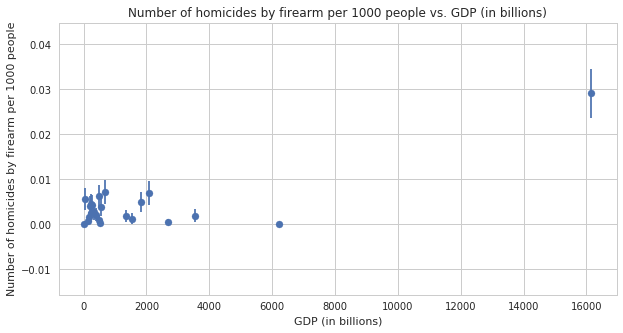

Number of homicides by firearm per 1000 people against GDP (in billions), errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA. 


In [107]:
# against gdp
# with error bar
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df8.gdp / 1e9 ,df8['Number of homicides by firearm'] / df8['pop'] * 1000)
ax.errorbar(df8.gdp / 1e9, df8['Number of homicides by firearm'] / df8['pop'] * 1000, 
            yerr = np.sqrt(df8['Number of homicides by firearm'] / df8['pop'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicides by firearm per 1000 people")
ax.set_ylim()
ax.set_title("Number of homicides by firearm per 1000 people vs. GDP (in billions)")
pl.show()
print ("Number of homicides by firearm per 1000 people against GDP (in billions), " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA. ")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [108]:
df8.tail()

Country/Territory  Number of homicides by firearm  \
18          Portugal                            44.0   
19             Spain                            90.0   
20            Sweden                            37.0   
21       Switzerland                            57.0   
22     United States                          9146.0   

    Average total all civilian firearms        Country  \
18                             900000.0       Portugal   
19                            4500000.0          Spain   
20                            2800000.0         Sweden   
21                            3400000.0    Switzerland   
22                          270000000.0  United States   

    Guns per 100 inhabitants  Number of mass shootings (1983-2013)  \
18                       8.5                                     1   
19                      10.4                                     1   
20                      31.6                                     2   
21                      45.7                                     2   
22                      88.8                                    78   

            pop           gdp  shootingspp  
18   10514844.0  2.163682e+11     0.000095  
19   46773055.0  1.336019e+12     0.000021  
20    9519374.0  5.438806e+11     0.000210  
21    7996861.0  6.680436e+11     0.000250  
22  313993272.0  1.615526e+13     0.000248

In [109]:
df9 = df8[df8['Country/Territory'] == 'United States' ]
df9.head()

Country/Territory  Number of homicides by firearm  \
22     United States                          9146.0   

    Average total all civilian firearms        Country  \
22                          270000000.0  United States   

    Guns per 100 inhabitants  Number of mass shootings (1983-2013)  \
22                      88.8                                    78   

            pop           gdp  shootingspp  
22  313993272.0  1.615526e+13     0.000248

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


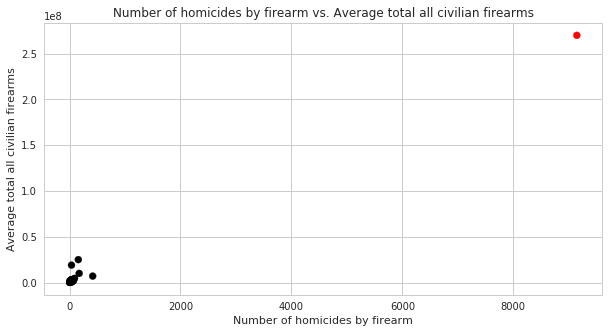

Number of homicides by firearm against Average total all civilian firearms, errors represent Poisson statistics.
The red datapoint to the top right of the plot is the USA. 


In [110]:
# number of homicides by fire arm against number of civilian firearms
# without error bar
x = df8['Number of homicides by firearm']
y = df8["Average total all civilian firearms"]

col = np.where(x<8000,'k',np.where(y<2.5,'k', 'r'))

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df8['Number of homicides by firearm'] ,df8["Average total all civilian firearms"], c=col)

ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
ax.set_title("Number of homicides by firearm vs. Average total all civilian firearms")
pl.show()
print ("Number of homicides by firearm against Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The red datapoint to the top right of the plot is the USA. ")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


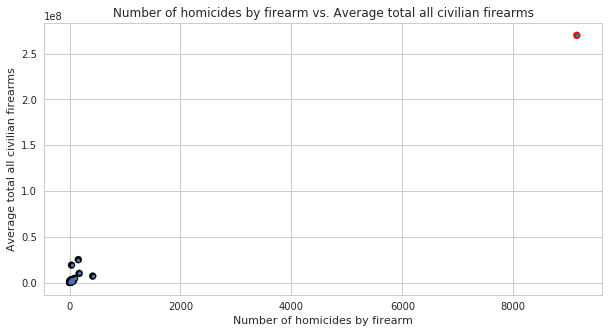

Number of homicides by firearm against Average total all civilian firearms, errors represent Poisson statistics.
The red datapoint to the top right of the plot is the USA. 


In [111]:
# number of homicides by fire arm against number of civilian firearms
# with error bar

x = df8['Number of homicides by firearm']
y = df8["Average total all civilian firearms"]

col = np.where(x<8000,'k',np.where(y<2.5,'k', 'r'))

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df8['Number of homicides by firearm'] ,df8["Average total all civilian firearms"], c=col, s=50)
ax.errorbar(df8['Number of homicides by firearm'], df8["Average total all civilian firearms"], 
            yerr = np.sqrt(df8["Average total all civilian firearms"] * 1.0), fmt = '.')
ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
ax.set_title("Number of homicides by firearm vs. Average total all civilian firearms")
pl.show()
print ("Number of homicides by firearm against Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The red datapoint to the top right of the plot is the USA. ")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


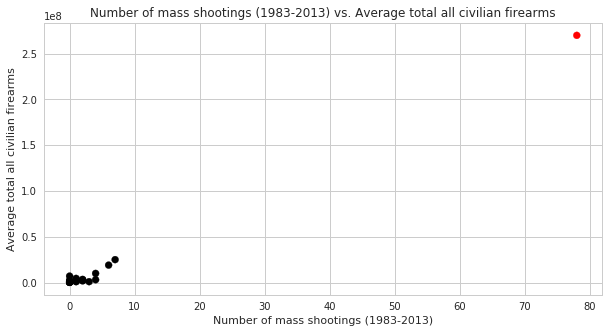

Number of mass shootings (1983-2013) against Average total all civilian firearms, errors represent Poisson statistics.
The red datapoint to the top right of the plot is the USA. 


In [130]:
# number of mass shootins against number of civilian firearms
# without error bar
x = df8['Number of mass shootings (1983-2013)']
y = df8["Average total all civilian firearms"]

col = np.where(x<70,'k',np.where(y<2.5,'k', 'r'))

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df8['Number of mass shootings (1983-2013)'] ,df8["Average total all civilian firearms"], c=col)

ax.set_xlabel("Number of mass shootings (1983-2013)")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
ax.set_title("Number of mass shootings (1983-2013) vs. Average total all civilian firearms")
pl.show()
print ("Number of mass shootings (1983-2013) against Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The red datapoint to the top right of the plot is the USA. ")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


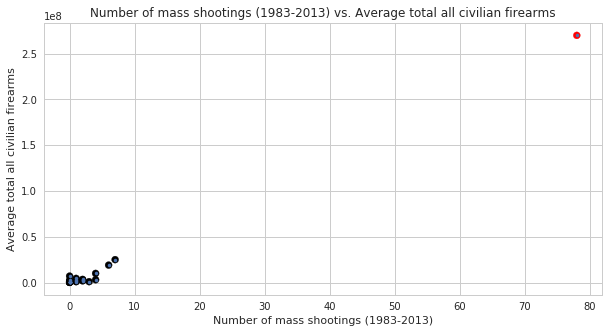

Number of mass shootings (1983-2013) against Average total all civilian firearms, errors represent Poisson statistics.
The red datapoint to the top right of the plot is the USA. 


In [131]:
# number of mass shootins against number of civilian firearms
# with error bar
x = df8['Number of mass shootings (1983-2013)']
y = df8["Average total all civilian firearms"]

col = np.where(x<70,'k',np.where(y<2.5,'k', 'r'))

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df8['Number of mass shootings (1983-2013)'] ,df8["Average total all civilian firearms"], c=col)
ax.errorbar(df8['Number of mass shootings (1983-2013)'], df8["Average total all civilian firearms"], 
            yerr = np.sqrt(df8["Average total all civilian firearms"] * 1.0), fmt = '.')
ax.set_xlabel("Number of mass shootings (1983-2013)")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
ax.set_title("Number of mass shootings (1983-2013) vs. Average total all civilian firearms")
pl.show()
print ("Number of mass shootings (1983-2013) against Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The red datapoint to the top right of the plot is the USA. ")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


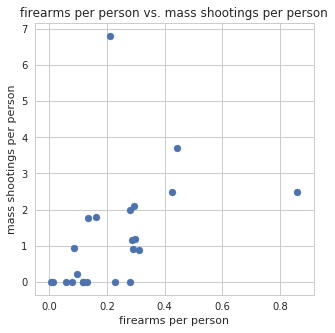

In [198]:
#  Plot one ~ Dr. Bianco's example's first subplot
# Before scaling to the same magnitude:
# after dividing the population, I observed and tried applying both by multipling 1e6 and removed the one for x-axis
# Thus, the plot is able to look the same as Dr Bianco's. 
x = (df8['Average total all civilian firearms'] / df8['pop'] )
y = (df8["Number of mass shootings (1983-2013)"] / df8['pop'] * 1e7)

fig = pl.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y)

ax.set_xlabel("firearms per person")
ax.set_ylabel("mass shootings per person")
ax.set_ylim()
ax.set_title("firearms per person vs. mass shootings per person")
pl.show()
# print ("Number of mass shootings (1983-2013) against Average total all civilian firearms, " + 
#       "errors represent Poisson statistics.\n" + 
#       "The red datapoint to the top right of the plot is the USA. ")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


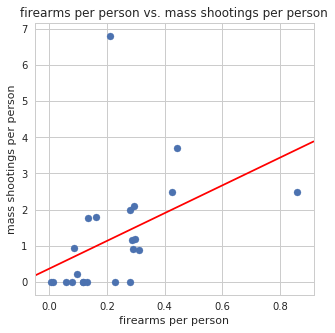

In [199]:
# ols fit
mod1 = smf.ols(formula='y ~ x', data = df8).fit()
abline_plot(model_results=mod1, ax=ax, color='red')

In [200]:
print (mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0367
Time:                        19:46:59   Log-Likelihood:                -40.676
No. Observations:                  23   AIC:                             85.35
Df Residuals:                      21   BIC:                             87.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3684      0.497      0.742      0.4

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


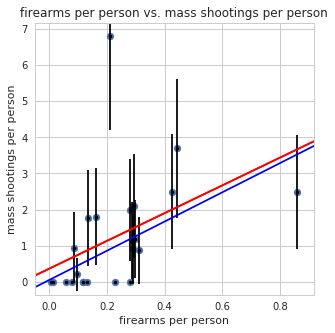

In [201]:
# wls fit
yerr = np.sqrt(df8["Number of mass shootings (1983-2013)"] / df8['pop'] * 1e7 * 1.0 + 1)
mod2 = smf.wls(formula='y ~ x', weights= 1.0 / yerr * 1.0, data = df8).fit()
ax.errorbar(x, y, 
           yerr = np.sqrt(df8["Number of mass shootings (1983-2013)"] / df8['pop'] * 1e7 * 1.0), fmt = '.', c = 'k')
abline_plot(model_results=mod2, ax=ax, color='blue')
abline_plot(model_results=mod1, ax=ax, color='red')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


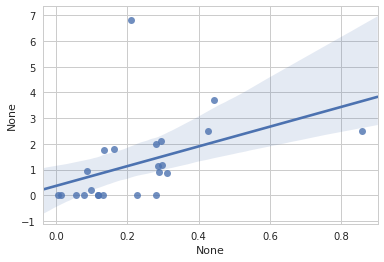

In [202]:
#3) seaborn
sns.regplot(x=x, y=y, data=df8)

In [243]:
z = np.polyfit(x, y, 10)
f = np.poly1d(z)
print (f)

           10             9             8             7            6
5.784e+07 x  - 1.933e+08 x + 2.665e+08 x - 1.978e+08 x + 8.64e+07 x
             5             4             3             2
 - 2.28e+07 x + 3.583e+06 x - 3.182e+05 x + 1.447e+04 x - 272.8 x + 1.346


In [244]:
x_new = np.linspace(x[0],x[22], 50)
y_new = f(x_new)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


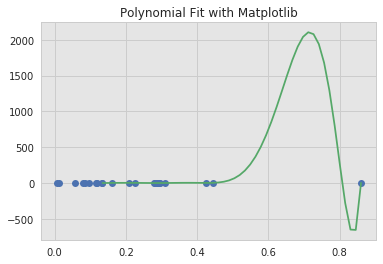

In [245]:
# Ref: https://plot.ly/matplotlib/polynomial-fits/
plt.plot(x,y,'o', x_new, y_new)
pl.title('Polynomial Fit with Matplotlib')
ax = plt.gca()
ax.set_axis_bgcolor((0.898, 0.898, 0.898))
fig = plt.gcf()


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


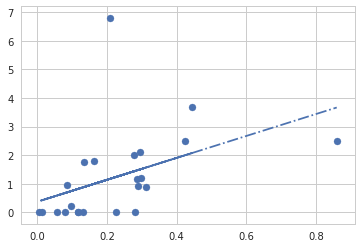

In [216]:
# beta1_np, beta0_np = np.polyfit(x, y, 1) 
# pl.plot(x, x * beta1_np + beta0_np, '-.',
#         label="numpy.polyfit line: %.1f x + %.1f"\
#        %(beta1_np, beta0_np))
# plt.scatter(x,y)

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



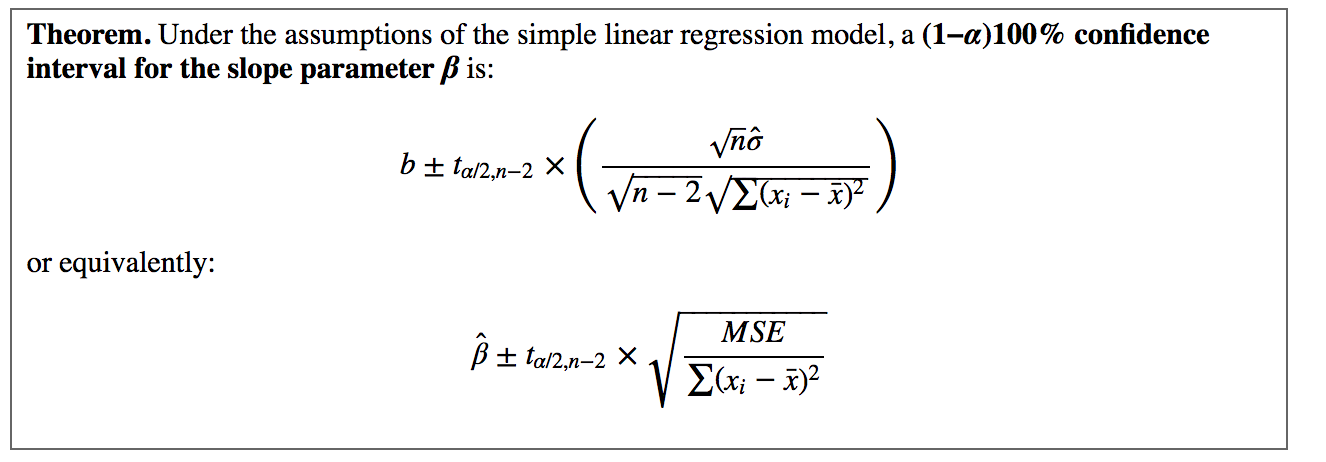

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

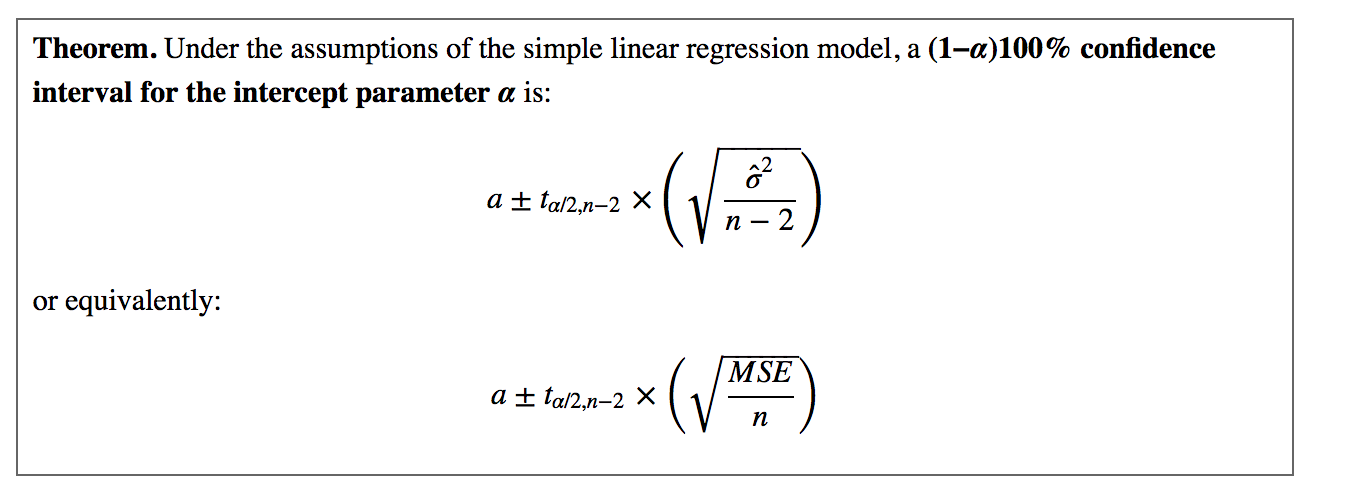

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

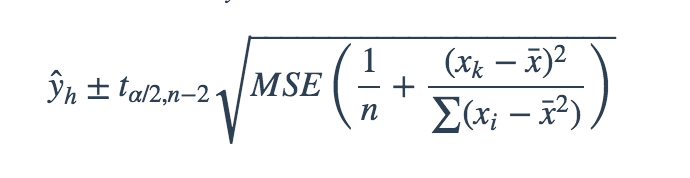

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

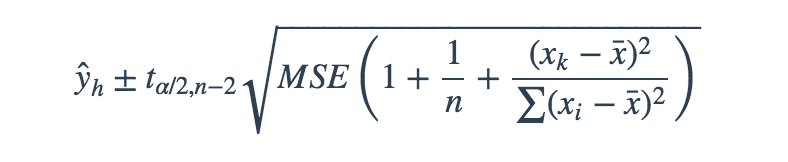

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

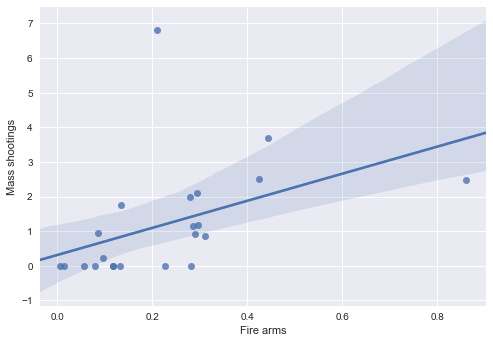

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

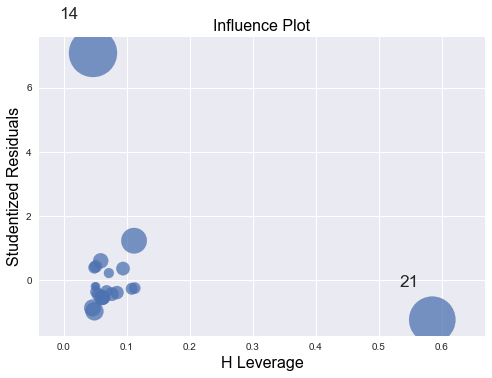

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings